# Лабораторная работа №1. 
####Емельянов Виталий, 293 гр, ФИВТ

##Импортирование необходимых библиотек и чтение данных

In [2]:
import numpy as np
import pandas
import matplotlib
%pylab inline

train_data = pandas.read_csv("train.csv")
test_data = pandas.read_csv("test.csv")

data = train_data.append(test_data)

Populating the interactive namespace from numpy and matplotlib


## Число пассажиров, ехавших первым классом

In [141]:
print 'Количество человек, ехавших первым классом =', data[data['Pclass'] == 1]['Pclass'].count() 

Количество человек, ехавших первым классом = 323


####Распределение по классам

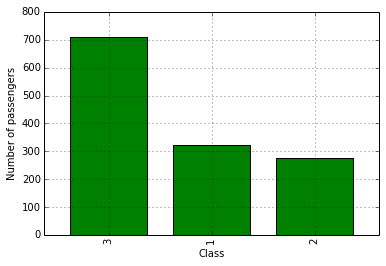

In [142]:
pclass_counts = data['Pclass'].value_counts()
diagram = pclass_counts.plot(kind='bar',color='green')
diagram.set_xlabel('Class')
diagram.set_ylabel('Number of passengers')

##Какой возраст имели пассажиры?

In [179]:
pandas.DataFrame(data['Age'].describe())


,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


<p>Видно, что самому "молодому" человеку на корабле было около 2-х месяцев, самому старому - 80 лет.<br>
Средний возраст пассажиров на корабле составлял около 30 лет.
</p>


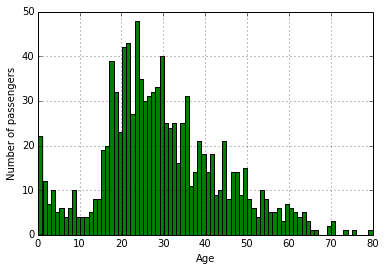

In [138]:
age_histogram = data['Age'].hist(bins = max(data['Age']), color='green')
age_histogram.set_xlabel('Age')
age_histogram.set_ylabel('Number of passengers')

##Коррелируют ли число братьев/сестер с числом родителей/детей?

In [189]:
frame = pandas.DataFrame()
frame['0'] = data.Parch
frame['1'] = data.SibSp

frame.corr()

,0,1
0,1.000000,0.373587
1,0.373587,1.000000


##Самое популярное женское имя на корабле

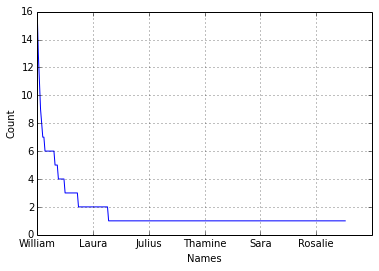

In [34]:
full_names = data['Name'][data.Sex == 'female']

names = []

for full_name in  full_names:
    items = full_name.split(' ')
    
    for i in xrange(len(items)):
        for symbol in items[i]:
            if symbol == '.':
                names.append(items[i+1])

s = pandas.Series(names)
diagram = s.value_counts().plot('line')

diagram.set_xlabel('Names')
diagram.set_ylabel('Count')

Если считать, что имя женщины идет после ее титула, то самое популярное женское имя на корабле William

##Как варьируется цена билета на Титаник?

In [3]:
pandas.DataFrame(data.Fare.describe())

,Fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


Максимальная цена на билет составляла около 512, минимальная - 0, видимо, для моряков.<br>
Средняя цена - около 33

##Какие титулы имели пассажиры, едущие различными классами?

In [161]:
frame = pandas.DataFrame()
for pclass in range(1,4):
    
    title_counts = set()
    
    passengers = data['Name'][data['Pclass'] == pclass]
    
    for passenger in passengers:
        items = passenger.split()
        
        for item in items:
            if item[-1] == '.':
                title_counts.add(item)
                
    frame['class ' + str(pclass)] = pandas.Series(list(title_counts))

frame
frame.fillna('')
    
    

,class 1,class 2,class 3
0,Miss.,Miss.,Ms.
1,Mme.,Rev.,Mr.
2,Countess.,Mrs.,Miss.
3,L.,Ms.,Mrs.
4,Dona.,Mr.,Master.
5,Jonkheer.,Dr.,
6,Sir.,Master.,
7,Mlle.,,
8,Mrs.,,
9,Capt.,,


Закономерно, что количество различных титулов тем больше, чем выше класс.

## Есть ли зависимость между классом и номером билета?

In [5]:
frame = pandas.DataFrame()

frame['pclass'] = data.Pclass
frame['ticket'] = data.Ticket

counter = 0
match = []

for pclass in list(frame['pclass']):
    for ticket in list(frame['ticket']):
        if str(pclass) == ticket[0]:
            match.append(1)
        else:
            match.append(0)

pandas.Series(match).mean()

0.26203792163438056

У меня изначально было предположение, что номер класса почти всегда соответствует первой цифре номера билета.<br>
Но, как видно, это опровергается тем, что частота таких совпадений всего 26%<br>
Глядя на остальные цифры билета, никакой очевидной закономерности не обнаруживается.

##Какой части пассажиров удалось выжить?

In [146]:
print data['Survived'].mean()

0.383838383838


Получается, что выжило около 38% пассажиров

##Верно ли, что женщины выживали чаще мужчин?

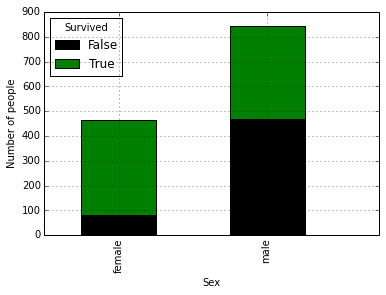

In [170]:
diagram = pandas.crosstab([data['Sex']], data['Survived'].astype(bool)).plot(kind='bar', stacked=True, color=['black', 'green'])
diagram.set_xlabel('Sex')
diagram.set_ylabel('Number of people')

In [154]:
data["Survived"][data.Sex == "female"].mean()

0.7420382165605095

In [155]:
data["Survived"][data.Sex == "male"].mean()

0.18890814558058924

~74% выживших женщин, против ~19% выживших мужчин.<br>
Отсюда можно сделать вывод, что женщины выживали чаще мужчин.

##Верно ли, что чаще выживали пассажиры с более дорогими билетами?

In [30]:
data[data['Fare'] > 100]['Survived'].mean()

0.73584905660377353

In [31]:
data[data['Fare'] < 33]['Survived'].mean()

0.31818181818181818

Видно, что пассажиры с более дорогими билетами выживали чаще, чем пассажиры с более дешевыми.

##Закономерности, точно описывающие группу выживших пассажиров

В надежде обнаружить какие-то новые закономерности построим признак-признак диаграммы.<br>
Может быть, где-то можно будет визуально отделить выживших от невыживших.

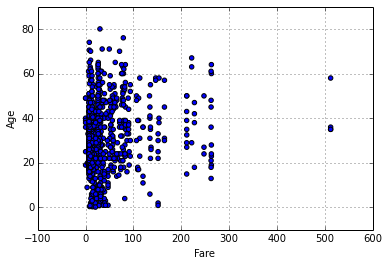

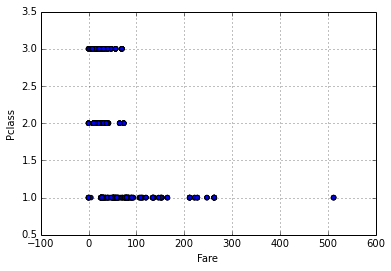

In [28]:
fare = pandas.DataFrame(data['Fare'])
age = pandas.DataFrame(data['Age'])
pclass = pandas.DataFrame(data['Pclass'])
peoples = pandas.DataFrame(data['Sex'])

data.plot(kind='scatter', x='Fare', y='Age');

data.plot(kind='scatter', x='Fare', y='Pclass');

Посмотрев на диаграммы, новых закономерностей я не обнаружил.

###Вывод

Из утверждений выше можно понять, что критерием выживаемости на Титанике было:
<ul>
<li><b>пол:</b> женщины выживали чаще мужчин</li>
<li><b>цена билета:</b> обладатели более дорогих билетов выживали чаще</li>
</ul>

Каких-то других параметров выживаемости я не обнаружил.